In [1]:
#Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from scipy.stats import zscore
import seaborn as sns
%matplotlib inline

# 1.EDA & Pre-processing (Make sure to remove all non-numeric entries from numeric columns) – 2.5 points

In [225]:
cars = pd.read_csv("cars-dataset.csv") 
cars.head()

,car name,cyl,disp,hp,wt,acc,yr,mpg
0,chevrolet chevelle malibu,8,307.0,130,3504,12.0,70,18.0
1,buick skylark 320,8,350.0,165,3693,11.5,70,15.0
2,plymouth satellite,8,318.0,150,3436,11.0,70,18.0
3,amc rebel sst,8,304.0,150,3433,12.0,70,16.0
4,ford torino,8,302.0,140,3449,10.5,70,17.0


In [226]:
# Dropping column car name
cars.drop(['car name'] , axis=1 ,inplace=True)
cars.drop(['yr'] , axis=1 ,inplace=True)
cars.head()

,cyl,disp,hp,wt,acc,mpg
0,8,307.0,130,3504,12.0,18.0
1,8,350.0,165,3693,11.5,15.0
2,8,318.0,150,3436,11.0,18.0
3,8,304.0,150,3433,12.0,16.0
4,8,302.0,140,3449,10.5,17.0


In [227]:
cars.describe().transpose() #Hp is missing

,count,mean,std,min,25%,50%,75%,max
cyl,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
disp,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
wt,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acc,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6


In [228]:
temp = pd.DataFrame(cars.hp.str.isdigit()) 

temp[temp['hp'] == False]

,hp
32,False
126,False
330,False
336,False
354,False
374,False


In [230]:
cars['hp'] = cars['hp'].astype('float64')

In [231]:
cars = cars.replace('?', np.nan)
cars["hp"] = cars["hp"].fillna(value=cars["hp"].mean())
cars.sample(5)

,cyl,disp,hp,wt,acc,mpg
286,8,302.0,129.0,3725,13.4,17.6
151,4,79.0,67.0,2000,16.0,31.0
157,8,350.0,145.0,4440,14.0,15.0
41,8,318.0,150.0,4096,13.0,14.0
82,4,120.0,97.0,2506,14.5,23.0


In [232]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 6 columns):
cyl     398 non-null int64
disp    398 non-null float64
hp      398 non-null float64
wt      398 non-null int64
acc     398 non-null float64
mpg     398 non-null float64
dtypes: float64(4), int64(2)
memory usage: 18.7 KB


In [46]:
cars.shape

(398, 7)

# 2.Use pair plot or scatter matrix to visualize how the different variables are related (Hint: The amount of Gaussian curves in the plot should give a visual identification of different clusters existing in the dataset) – 5 points

In [233]:
import warnings 
warnings.filterwarnings('ignore')

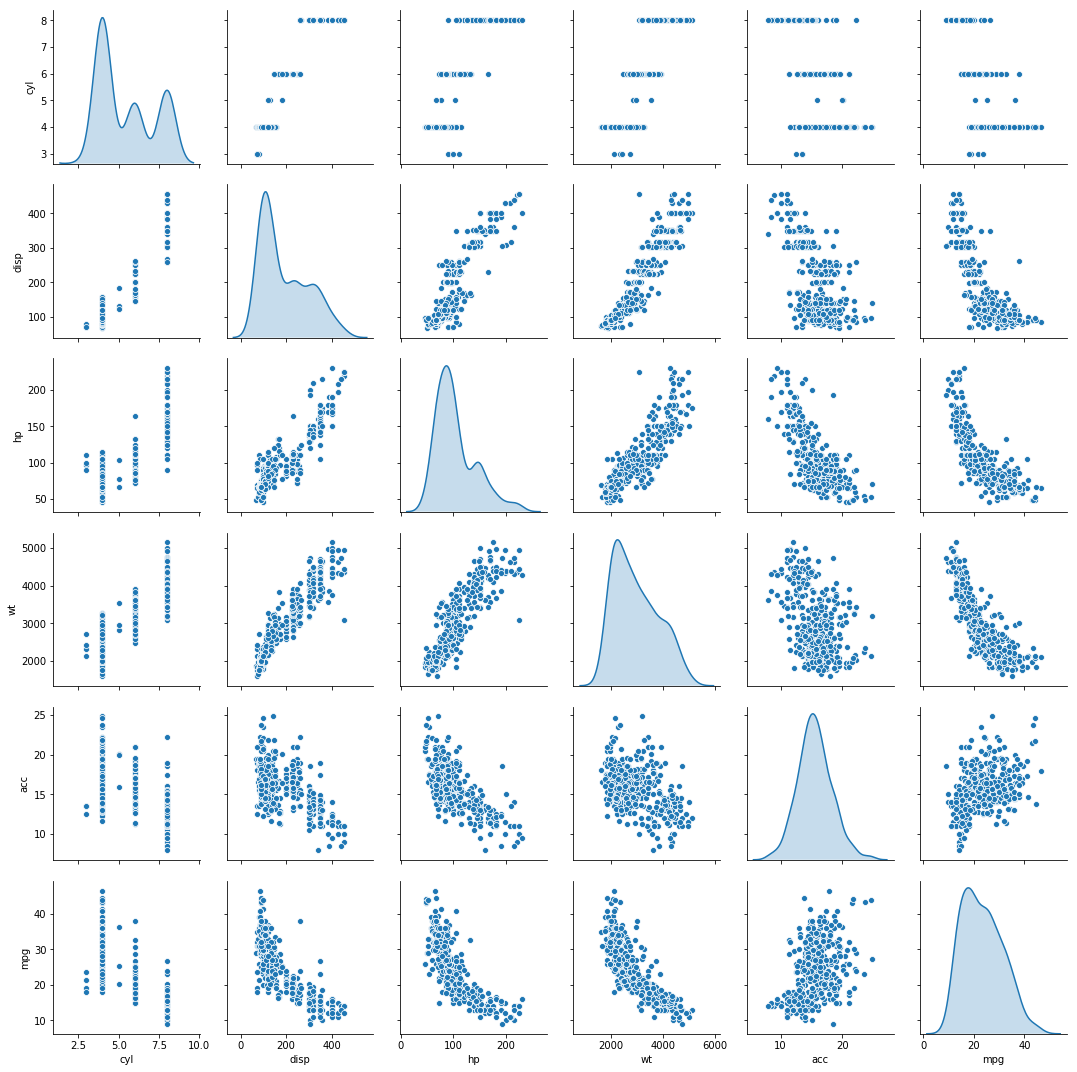

In [234]:
sns.pairplot(cars, diag_kind='kde')

In [ ]:
# Observations from the data set
#
# 1. Car Name – It represents the name of the car 
#             - It is not of much significance and should be dropped.
#
# 2. Cyl  – It represents the no. of cylinders in the car
#         - Data is dicrete in nature and shows presence of many peaks
#
# 3. Disp – It represents displacement
#         - It is right tailed or right skewed in nature.
#         - Mean and median differ by a significant value.  
#         - Presence of outliers on higher or right end of central values
#
# 4.Hp – It represents horsepower
#      - It is right tailed or right skewed in nature. 
#      - Presence of outliers on higher or right end of central values
#                 
# 5.Wt – It represents the weight of the car 
#      - it is slightly right tailed or right skewed in nature.
#      - Mean and median differ but not much
#      - Presence of outliers on higher or right end of central values
#
# 6. Acc – It represents the accleration of car
#          - Data is quite evenly distributed in nature.
#          - Mean and median negligibly differ (almost same)
#          - Weak presence of outliers along central values
#
# 7. Yr – It represents the Model of the car 
#       - Data is dicrete in nature and shows presence of many peaks
#
# 8. Mpg – It represents miles per gallon
#        - It is right tailed or right skewed in nature. 
#        - Presence of outliers on higher or right end of central values

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000184E3CB3D30>,
      dtype=object)

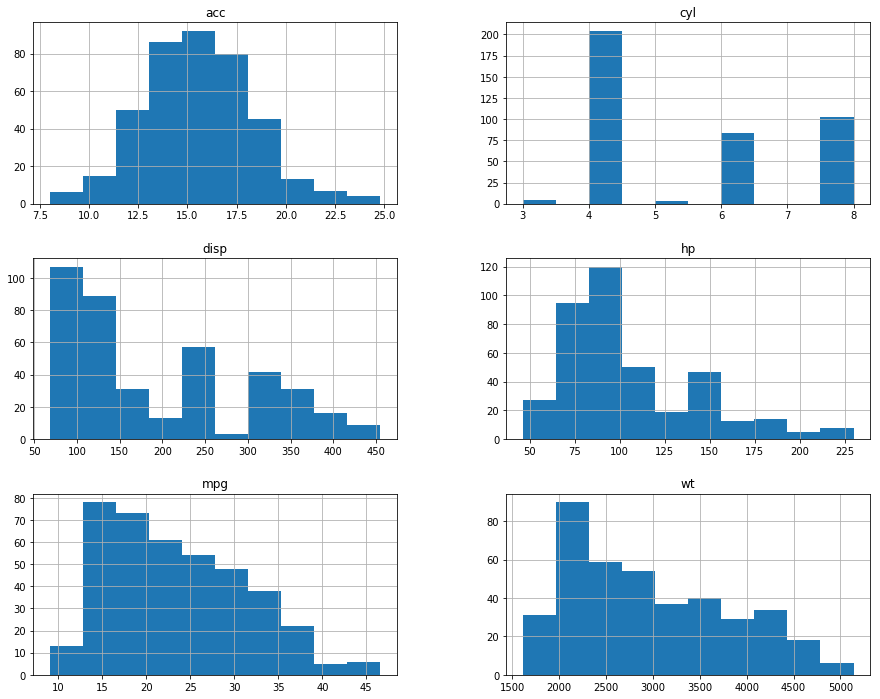

In [235]:
# Histogram representation - univariate analysis
cars.hist(figsize=[15,12])

In [33]:
cars.corr()

,cyl,disp,hp,wt,acc,yr,mpg
cyl,1.000000,0.950721,0.838939,0.896017,-0.505419,-0.348746,-0.775396
disp,0.950721,1.000000,0.893646,0.932824,-0.543684,-0.370164,-0.804203
hp,0.838939,0.893646,1.000000,0.860574,-0.684259,-0.411651,-0.771437
wt,0.896017,0.932824,0.860574,1.000000,-0.417457,-0.306564,-0.831741
acc,-0.505419,-0.543684,-0.684259,-0.417457,1.000000,0.288137,0.420289
yr,-0.348746,-0.370164,-0.411651,-0.306564,0.288137,1.000000,0.579267
mpg,-0.775396,-0.804203,-0.771437,-0.831741,0.420289,0.579267,1.000000


# 3.Use K Means or Hierarchical clustering to find out the optimal no of clusters in the data. Identify and separate the clusters (15 points)

In [108]:
from scipy.stats import zscore

cars_z = cars.apply(zscore)

# K Means clustering

In [97]:
from sklearn.cluster import KMeans
from sklearn import metrics

In [236]:
cluster_range = range( 2, 10)   # expect 2 to 3 clusters from the pair plot visual inspection hence restricting from 2 to 10
cluster_errors = []                            #name for cluster inertia
cluster_sil_scores = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters)  # can use ( num_clusters, n_init = 5) by default n_init=5
  clusters.fit(cars_z)
  labels = clusters.labels_                     # capture the cluster lables
  centroids = clusters.cluster_centers_         # capture the centroids
  cluster_errors.append( clusters.inertia_ )    # capture the intertia
  cluster_sil_scores.append(metrics.silhouette_score(cars_z, labels, metric='euclidean'))


# combine the cluster_range and cluster_errors into a dataframe by combining them
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors , "Avg Sil Score": cluster_sil_scores } )
clusters_df[0:15]

,num_clusters,cluster_errors,Avg Sil Score
0,2,1100.000309,0.580778
1,3,610.856681,0.530154
2,4,499.867525,0.433603
3,5,444.688603,0.367034
4,6,382.700240,0.357558
5,7,342.384110,0.309252
6,8,309.484837,0.300267
7,9,291.990236,0.294430


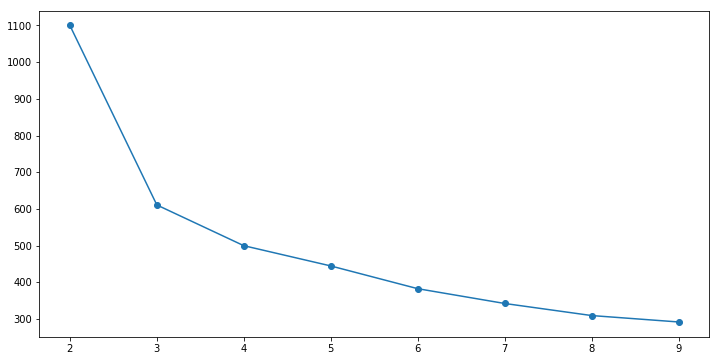

In [237]:
# Elbow plot -> done to find the range , and the elbow point

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

# The elbow plot shows that 3 is a good choice for K (number of clusters) 

In [238]:
cluster = KMeans( n_clusters = 3, random_state = 1 ) 
cluster.fit(cars_z)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=1, tol=0.0001, verbose=0)

In [239]:
# Getting the centroids

centroids = cluster.cluster_centers_
centroids

array([[ 3.45983342e-01,  2.36894164e-01, -6.90570474e-02,
         2.97951871e-01,  3.00890038e-01, -4.72444526e-01,
        -1.33226763e-15, -1.33226763e-15],
       [-8.53476958e-01, -8.03213744e-01, -6.72865641e-01,
        -7.85498786e-01,  3.61334147e-01,  7.53946607e-01,
         1.00000000e+00,  1.00000000e+00],
       [ 1.48605460e+00,  1.48450715e+00,  1.50283041e+00,
         1.38753374e+00, -1.06267868e+00, -1.15110476e+00,
         2.00000000e+00,  2.00000000e+00]])

In [268]:
# Let us put the raw centroid values into a dataframe under respective columns

centroid_df = pd.DataFrame(centroids, columns = list(cars_z))
centroid_df.drop(['cluster_label'] , axis=1 ,inplace=True)
centroid_df

,cyl,disp,hp,wt,acc,mpg,GROUP
0,0.345983,0.236894,-0.069057,0.297952,0.300890,-0.472445,-1.332268e-15
1,-0.853477,-0.803214,-0.672866,-0.785499,0.361334,0.753947,1.000000e+00
2,1.486055,1.484507,1.502830,1.387534,-1.062679,-1.151105,2.000000e+00


In [241]:
prediction=cluster.predict(cars_z)  #which records associated with each data points , each record has cluster id  
cars_z["GROUP"] = prediction

In [242]:
# Count the number of records per group to check the group symmetry 
# Clustering resulting large clusters and small satellite clusters is not good. May need hierarchial clustering in that case

cars_z.groupby("GROUP").count() #Always count how many clusters in a data set

,cyl,disp,hp,wt,acc,mpg,cluster_label
GROUP,,,,,,,
0,94,94,94,94,94,94,94
1,207,207,207,207,207,207,207
2,97,97,97,97,97,97,97


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000184E46B1978>,
      dtype=object)

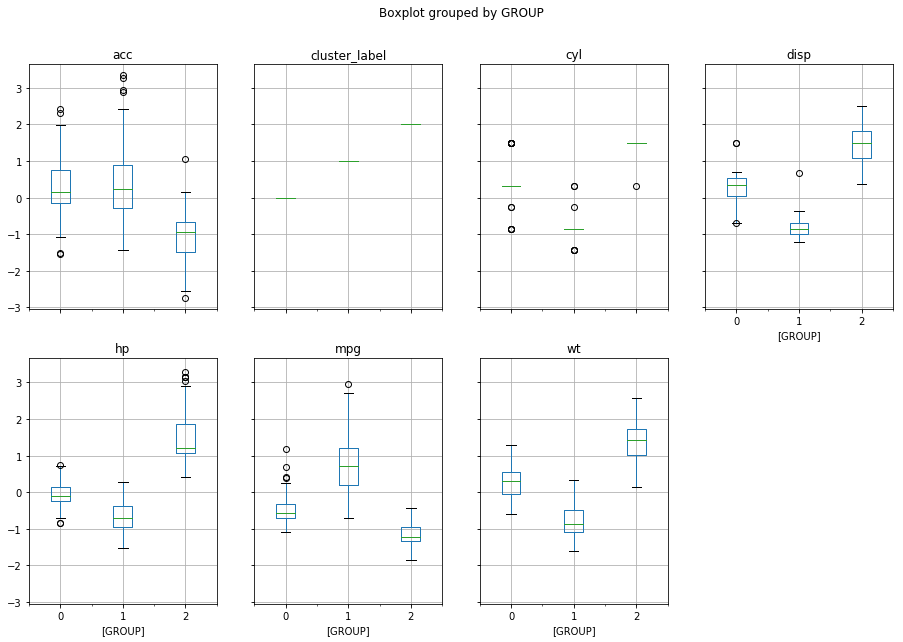

In [243]:
import matplotlib.pylab as plt

cars_z.boxplot(by = 'GROUP',  layout=(2,4), figsize=(15, 10))

In [244]:
# Addressing outliers at group level

data = cars_z   # Renaming to data. Data is not a copy of the dataframe
       
def replace(group):     #(group - user defined variable can be abc or anything)
    median, std = group.median(), group.std()  #Get the median and the standard deviation of every group 
    outliers = (group - median).abs() > 2*std # Subtract median from every member of each group. Take absolute values > 2std
    group[outliers] = group.median()       
    return group

data_corrected = (data.groupby('GROUP').transform(replace)) 
concat_data = data_corrected.join(pd.DataFrame(cars_z['GROUP']))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000184E508D1D0>,
      dtype=object)

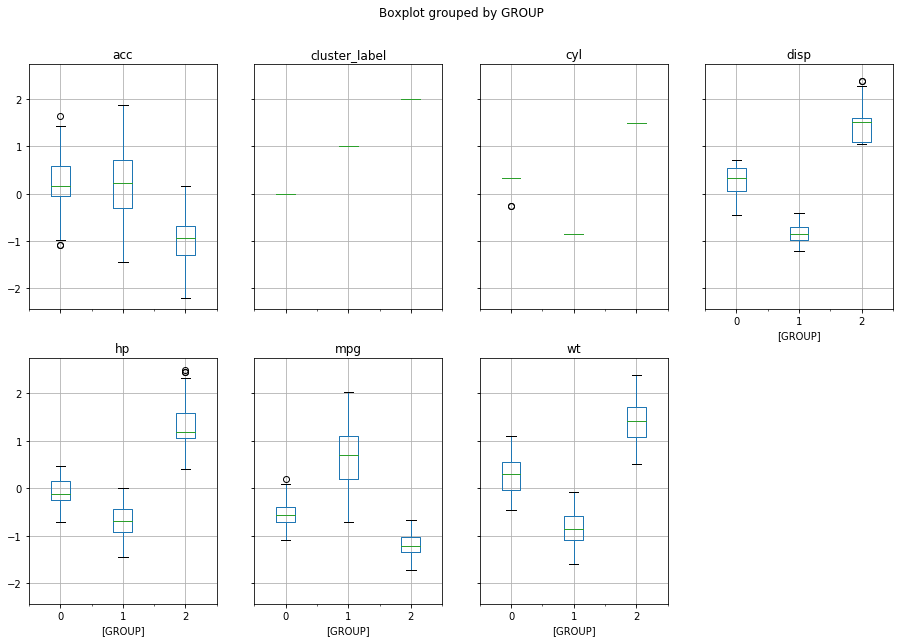

In [245]:
concat_data.boxplot(by = 'GROUP', layout=(2,4), figsize=(15, 10))

# OR

# Hierarchial Clustering 

In [246]:
from sklearn.cluster import AgglomerativeClustering 

In [247]:
model = AgglomerativeClustering(n_clusters=3, affinity='euclidean',  linkage='average')

In [248]:
model.fit(cars)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='average', memory=None,
            n_clusters=3, pooling_func='deprecated')

In [249]:
cars['labels'] = model.labels_

cars.groupby(["labels"]).count()

,cyl,disp,hp,wt,acc,mpg
labels,,,,,,
0,266,266,266,266,266,266
1,64,64,64,64,64,64
2,68,68,68,68,68,68


In [250]:
cars_clusters = cars.groupby(['labels'])

In [251]:
cars_groups=cars_clusters.head(398)#This creates a pandas dataframegroupby object

In [252]:
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage

In [253]:
from scipy.spatial.distance import pdist  #Pairwise distribution between data points

In [254]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z = linkage(cars, 'average')  #creates the grid of average linkage bases distance
c, coph_dists = cophenet(Z , pdist(cars))

c

0.7782913099001618

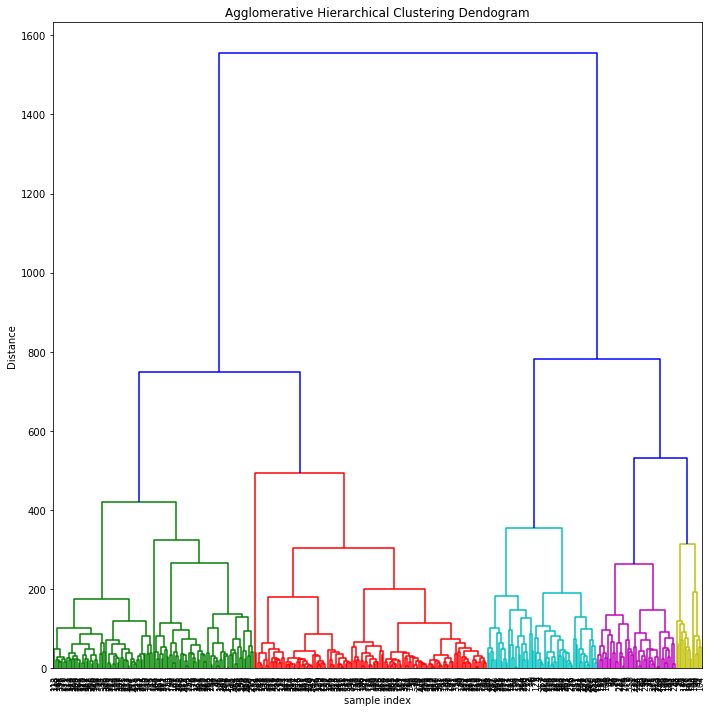

In [255]:
plt.figure(figsize=(10, 10))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold = 500, leaf_font_size=8. ) #color_threshold tells where to drop/place horizontal line
plt.tight_layout()

In [256]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z = linkage(cars, 'complete')
c, coph_dists = cophenet(Z , pdist(cars))

c

0.783487588759029

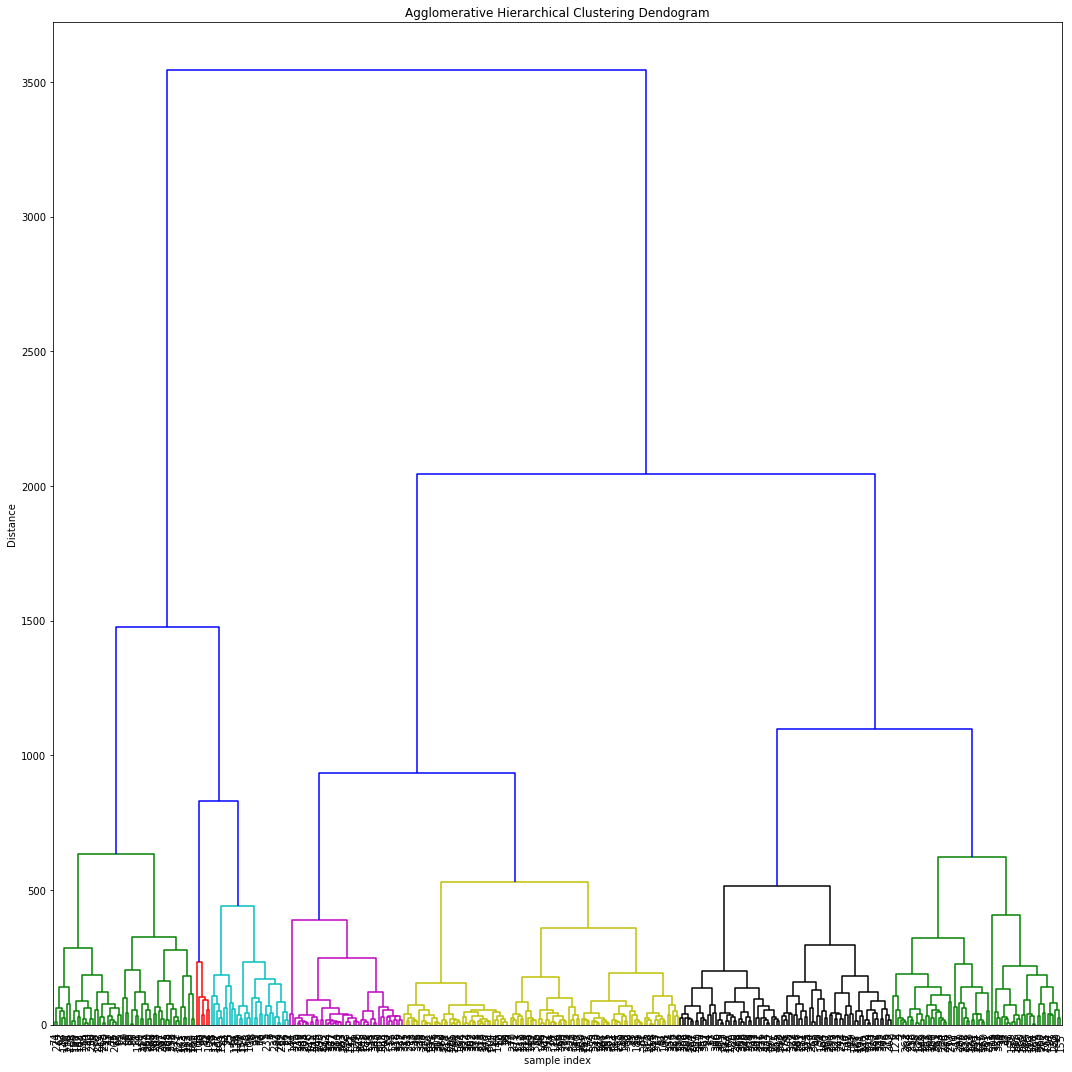

In [257]:
plt.figure(figsize=(15, 15))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold=700,  leaf_font_size=10. )
plt.tight_layout()

In [258]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z = linkage(cars, 'ward')
c, coph_dists = cophenet(Z , pdist(cars))

c

0.7737797281315226

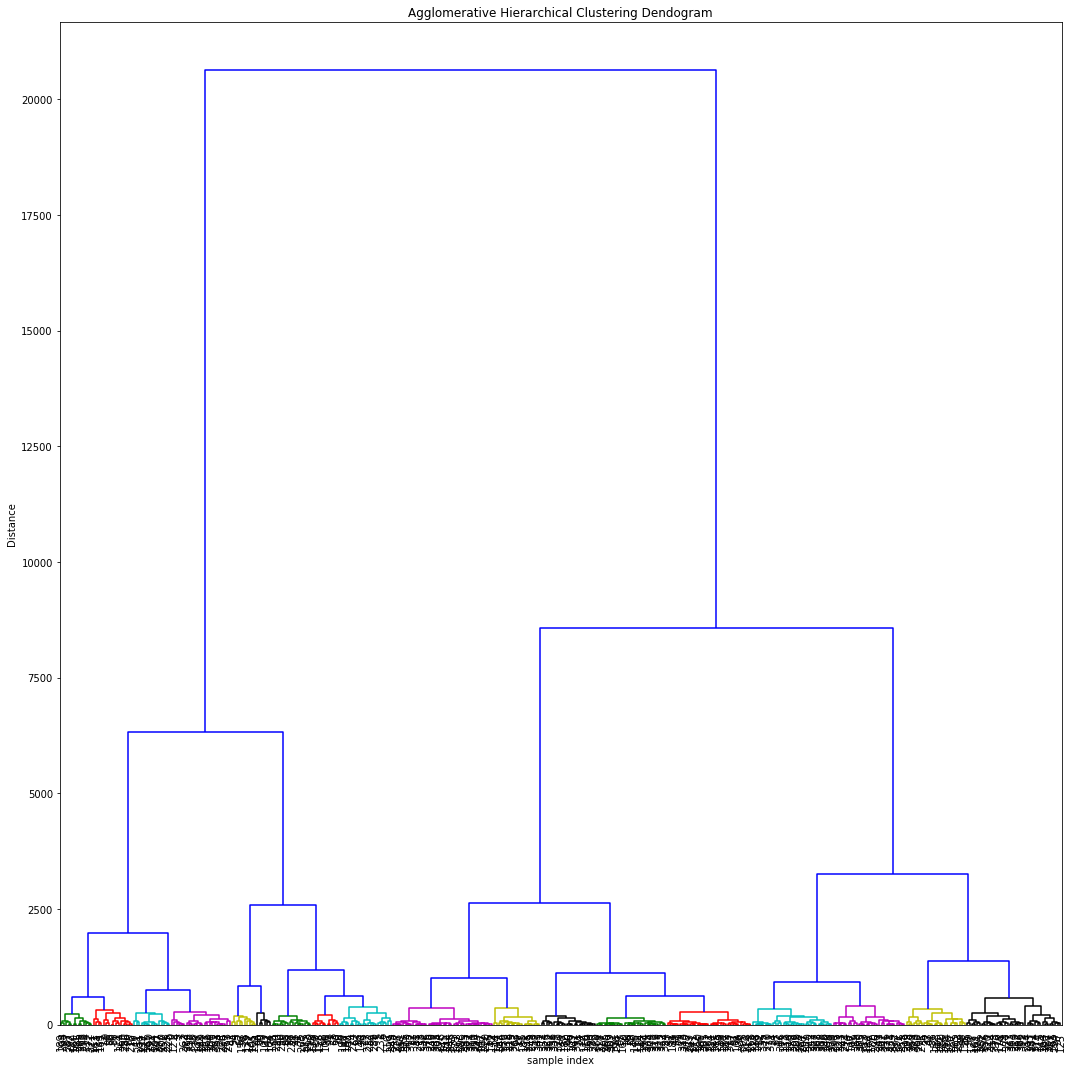

In [259]:
plt.figure(figsize=(15, 15))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold=600,  leaf_font_size=10. )
plt.tight_layout()

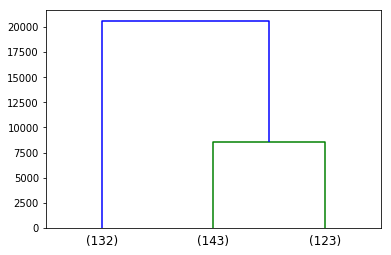

In [260]:
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=3,  # show only the last p merged clusters
)
plt.show()

In [ ]:
# Identified and separated the 3 clusters using Heirarchial Clustering

# 4.Use linear regression model on different clusters separately and print the coefficients of the models individually (7.5 points)

In [261]:
from sklearn.linear_model import LinearRegression

<BarContainer object of 3 artists>

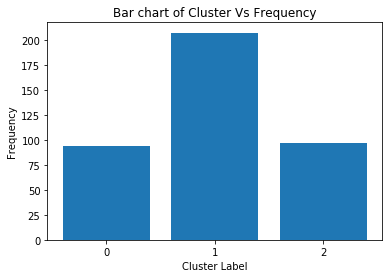

In [262]:
label_array=np.unique(cluster.labels_, return_counts=True)
plt.title("Bar chart of Cluster Vs Frequency")
plt.xticks(label_array[0])
plt.xlabel("Cluster Label")
plt.ylabel("Frequency")
plt.bar(x=label_array[0],height=label_array[1])

In [267]:
#Linear regression model for 3 clusters
for each_label in label_array[0]:
    cluster_data = data[data['cluster_label']==each_label]
    linear_reg_model = LinearRegression()
    linear_reg_model.fit(X=cluster_data.iloc[:,2:8],y=cluster_data.iloc[:,1])
    print('coefficients for cluster label = {}'.format(each_label))
    print(linear_reg_model.coef_)
    print("")

coefficients for cluster label = 0
[-0.38464709  0.75158532 -0.14473809  0.02945693  0.          0.        ]

coefficients for cluster label = 1
[-0.02193107  0.48366147 -0.03860658  0.01653801  0.          0.        ]

coefficients for cluster label = 2
[ 0.19800812  0.40060792 -0.35790298  0.0261437   0.          0.        ]

